In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import cv2
import os
import time
from keras.applications import vgg16
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import InputLayer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
data_path = '/content/drive/My Drive/dataset/CK+48/'
data_dir_list = os.listdir(data_path)

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.resize(input_img,(224,224))
        img_data_list.append(input_img)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-sadness

Loaded the images of dataset-happy

Loaded the images of dataset-anger

Loaded the images of dataset-surprise



(927, 224, 224, 3)

In [4]:
num_classes = 6

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:135]=0 #135
labels[135:312]=1 #177
labels[312:387]=2 #75
labels[387:594]=3 #207
labels[594:678]=4 #84
labels[678:927]=5 #249

# labels =to_categorical(labels, num_classes)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [5]:
input_shape=(224,224,3)
vgg = vgg16.VGG16(include_top=True, weights='imagenet')

out = Dense(6, activation='softmax', name='predictions')(vgg.layers[-2].output)
vgg_model = Model(vgg.input, out)

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['predictions','fc1','fc2']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

553467904/553467096 [==============================] - 38s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  app.launch_new_instance()


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fc70ccde978>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7fc70ccdea20>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fc70ccdec88>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fc70bfd3208>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fc70bfd3160>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fc70bfd3e48>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fc70bff7c88>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fc70bff7ac8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fc70bffe7f0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fc70c002390>,block3_conv3,False


In [6]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [7]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(img_data, labels)

10

In [8]:
import matplotlib.pyplot as plt

def cnn_model(x_train,x_test,y_test,y_train):
    model = Sequential()
    model.add(vgg_model)
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 


    history=model.fit(x_train, y_train, epochs=50, batch_size=30,verbose=1)
    model.compile(loss = "categorical_crossentropy",optimizer = Adam(), metrics=['accuracy'],)

    loss,acc = model.evaluate(x_test, y_test)
    y_prediction = model.predict_classes(x_test)
    y_test_original=np.argmax(y_test,axis=1)
    confusion=confusion_matrix(y_true=y_test_original, y_pred=y_prediction)
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.title('model history')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.title('model history')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    return acc,confusion

Epoch 1/50
834/834 [==============================] - 23s 27ms/step - loss: 6.3079 - accuracy: 0.2566
Epoch 2/50
834/834 [==============================] - 11s 14ms/step - loss: 1.2501 - accuracy: 0.5060
Epoch 3/50
834/834 [==============================] - 11s 14ms/step - loss: 0.8933 - accuracy: 0.6607
Epoch 4/50
834/834 [==============================] - 11s 14ms/step - loss: 0.6936 - accuracy: 0.7338
Epoch 5/50
834/834 [==============================] - 11s 14ms/step - loss: 0.6082 - accuracy: 0.7578
Epoch 6/50
834/834 [==============================] - 11s 14ms/step - loss: 0.4542 - accuracy: 0.8010
Epoch 7/50
834/834 [==============================] - 11s 14ms/step - loss: 0.3868 - accuracy: 0.8297
Epoch 8/50
834/834 [==============================] - 11s 14ms/step - loss: 0.3820 - accuracy: 0.8261
Epoch 9/50
834/834 [==============================] - 11s 14ms/step - loss: 0.4362 - accuracy: 0.7974
Epoch 10/50
834/834 [==============================] - 11s 14ms/step - loss: 0.368

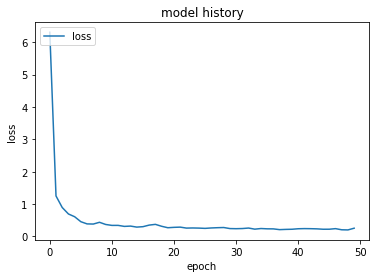

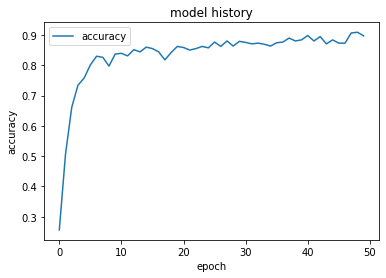

0.6129032373428345
[[13  1  0  0  0  0]
 [16  2  0  0  0  0]
 [ 0  6  1  0  0  0]
 [ 0  0 10 11  0  0]
 [ 1  0  0  2  5  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/50
834/834 [==============================] - 11s 14ms/step - loss: 0.3467 - accuracy: 0.8585
Epoch 2/50
834/834 [==============================] - 11s 13ms/step - loss: 0.2566 - accuracy: 0.8885
Epoch 3/50
834/834 [==============================] - 11s 13ms/step - loss: 0.2548 - accuracy: 0.8825
Epoch 4/50
834/834 [==============================] - 11s 13ms/step - loss: 0.2628 - accuracy: 0.8861
Epoch 5/50
834/834 [==============================] - 11s 13ms/step - loss: 0.2406 - accuracy: 0.8933
Epoch 6/50
834/834 [==============================] - 11s 13ms/step - loss: 0.2619 - accuracy: 0.8825
Epoch 7/50
834/834 [==============================] - 11s 13ms/step - loss: 0.2688 - accuracy: 0.8717
Epoch 8/50
834/834 [==============================] - 11s 13ms/step - loss: 0.2164 - accuracy: 0.8981
Epoch 9/5

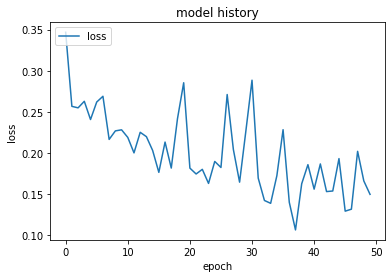

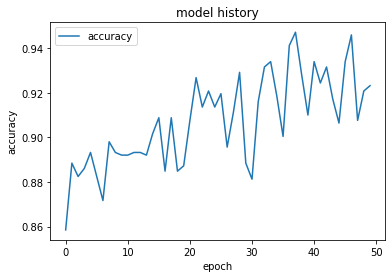

0.7204301357269287
[[11  3  0  0  0  0]
 [10  8  0  0  0  0]
 [ 0  5  2  0  0  0]
 [ 0  0  3 18  0  0]
 [ 0  0  0  5  3  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/50
834/834 [==============================] - 11s 14ms/step - loss: 0.2599 - accuracy: 0.8861
Epoch 2/50
834/834 [==============================] - 11s 13ms/step - loss: 0.2152 - accuracy: 0.8993
Epoch 3/50
834/834 [==============================] - 11s 13ms/step - loss: 0.1824 - accuracy: 0.9197
Epoch 4/50
834/834 [==============================] - 11s 13ms/step - loss: 0.1676 - accuracy: 0.9197
Epoch 5/50
834/834 [==============================] - 11s 13ms/step - loss: 0.1599 - accuracy: 0.9341
Epoch 6/50
834/834 [==============================] - 11s 14ms/step - loss: 0.1671 - accuracy: 0.9269
Epoch 7/50
834/834 [==============================] - 11s 13ms/step - loss: 0.1487 - accuracy: 0.9281
Epoch 8/50
834/834 [==============================] - 11s 13ms/step - loss: 0.1863 - accuracy: 0.9041
Epoch 9/5

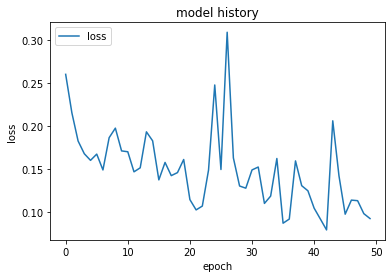

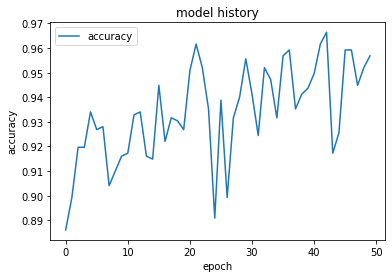

0.8602150678634644
[[14  0  0  0  0  0]
 [ 2 15  0  0  0  0]
 [ 0  4  4  0  0  0]
 [ 0  0  5 16  0  0]
 [ 0  0  0  2  6  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/50
834/834 [==============================] - 11s 14ms/step - loss: 0.1568 - accuracy: 0.9424
Epoch 2/50
834/834 [==============================] - 11s 14ms/step - loss: 0.1184 - accuracy: 0.9520
Epoch 3/50
834/834 [==============================] - 11s 13ms/step - loss: 0.1493 - accuracy: 0.9329
Epoch 4/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0947 - accuracy: 0.9604
Epoch 5/50
834/834 [==============================] - 11s 13ms/step - loss: 0.1069 - accuracy: 0.9556
Epoch 6/50
834/834 [==============================] - 11s 13ms/step - loss: 0.1638 - accuracy: 0.9173
Epoch 7/50
834/834 [==============================] - 11s 13ms/step - loss: 0.1749 - accuracy: 0.9185
Epoch 8/50
834/834 [==============================] - 11s 13ms/step - loss: 0.1109 - accuracy: 0.9652
Epoch 9/5

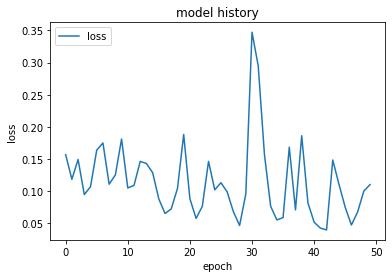

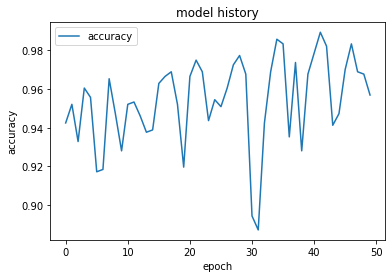

0.8924731016159058
[[12  2  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  4  4  0  0]
 [ 0  0  2 19  0  0]
 [ 0  0  0  2  6  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/50
834/834 [==============================] - 11s 14ms/step - loss: 0.1525 - accuracy: 0.9388
Epoch 2/50
834/834 [==============================] - 11s 14ms/step - loss: 0.1072 - accuracy: 0.9556
Epoch 3/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0723 - accuracy: 0.9664
Epoch 4/50
834/834 [==============================] - 11s 13ms/step - loss: 0.1251 - accuracy: 0.9496
Epoch 5/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0642 - accuracy: 0.9760
Epoch 6/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0615 - accuracy: 0.9760
Epoch 7/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0807 - accuracy: 0.9628
Epoch 8/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0607 - accuracy: 0.9784
Epoch 9/5

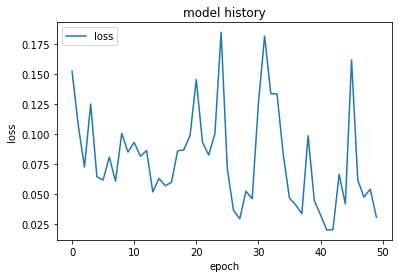

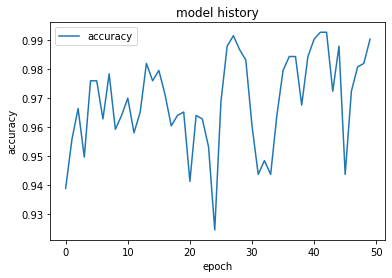

0.8924731016159058
[[14  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  3  5  0  0]
 [ 0  0  4 16  0  0]
 [ 0  0  0  1  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/50
834/834 [==============================] - 11s 14ms/step - loss: 0.1747 - accuracy: 0.9317
Epoch 2/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0755 - accuracy: 0.9676
Epoch 3/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0364 - accuracy: 0.9856
Epoch 4/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0303 - accuracy: 0.9892
Epoch 5/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0237 - accuracy: 0.9928
Epoch 6/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0883 - accuracy: 0.9688
Epoch 7/50
834/834 [==============================] - 11s 13ms/step - loss: 0.1701 - accuracy: 0.9460
Epoch 8/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0696 - accuracy: 0.9808
Epoch 9/5

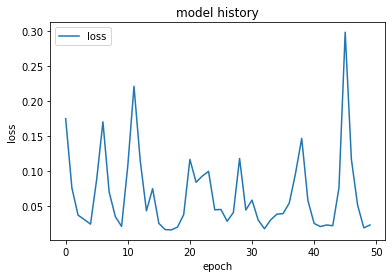

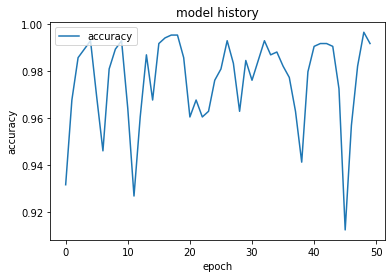

0.9569892287254333
[[12  1  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  6  2  0  0]
 [ 0  0  1 19  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/50
834/834 [==============================] - 11s 14ms/step - loss: 0.1997 - accuracy: 0.9376
Epoch 2/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0449 - accuracy: 0.9796
Epoch 3/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0368 - accuracy: 0.9856
Epoch 4/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0252 - accuracy: 0.9928
Epoch 5/50
834/834 [==============================] - 11s 14ms/step - loss: 0.0248 - accuracy: 0.9904
Epoch 6/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0270 - accuracy: 0.9892
Epoch 7/50
834/834 [==============================] - 11s 13ms/step - loss: 0.0430 - accuracy: 0.9844
Epoch 8/50
834/834 [==============================] - 11s 13ms/step - loss: 0.2358 - accuracy: 0.9269
Epoch 9/5

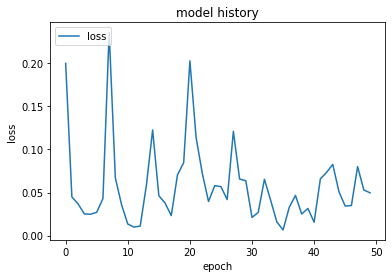

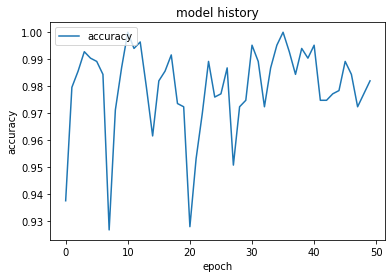

0.9569892287254333
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  2 18  0  0]
 [ 0  0  0  2  7  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/50
835/835 [==============================] - 14s 17ms/step - loss: 0.0777 - accuracy: 0.9749
Epoch 2/50
835/835 [==============================] - 11s 14ms/step - loss: 0.0731 - accuracy: 0.9772
Epoch 3/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0138 - accuracy: 0.9976
Epoch 4/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0089 - accuracy: 0.9964
Epoch 5/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0060 - accuracy: 0.9976
Epoch 6/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0365 - accuracy: 0.9904
Epoch 7/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0934 - accuracy: 0.9725
Epoch 8/50
835/835 [==============================] - 11s 13ms/step - loss: 0.2090 - accuracy: 0.9473
Epoch 9/5

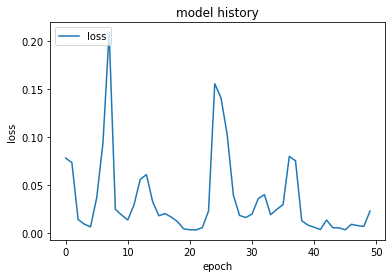

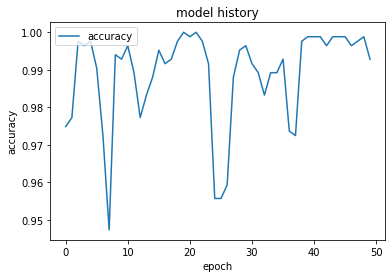

0.9239130616188049
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  1  6  0  0]
 [ 0  0  0 20  1  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 24]]
----------------------------
Epoch 1/50
835/835 [==============================] - 11s 14ms/step - loss: 0.0651 - accuracy: 0.9725
Epoch 2/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0617 - accuracy: 0.9796
Epoch 3/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0498 - accuracy: 0.9808
Epoch 4/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0290 - accuracy: 0.9868
Epoch 5/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0696 - accuracy: 0.9772
Epoch 6/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0368 - accuracy: 0.9868
Epoch 7/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0283 - accuracy: 0.9868
Epoch 8/50
835/835 [==============================] - 11s 13ms/step - loss: 0.1186 - accuracy: 0.9629
Epoch 9/5

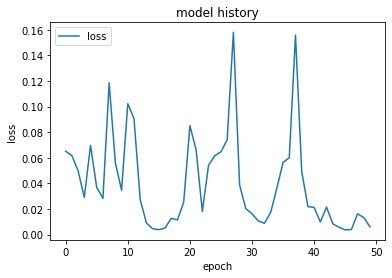

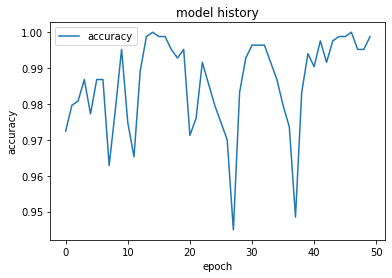

0.945652186870575
[[13  0  0  0  0  0]
 [ 0 15  3  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 20  1  0]
 [ 0  0  0  1  7  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/50
835/835 [==============================] - 11s 14ms/step - loss: 0.0624 - accuracy: 0.9844
Epoch 2/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0661 - accuracy: 0.9749
Epoch 3/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0144 - accuracy: 0.9928
Epoch 4/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0378 - accuracy: 0.9784
Epoch 5/50
835/835 [==============================] - 11s 13ms/step - loss: 0.1788 - accuracy: 0.9497
Epoch 6/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0835 - accuracy: 0.9725
Epoch 7/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0161 - accuracy: 0.9940
Epoch 8/50
835/835 [==============================] - 11s 13ms/step - loss: 0.0066 - accuracy: 0.9988
Epoch 9/50

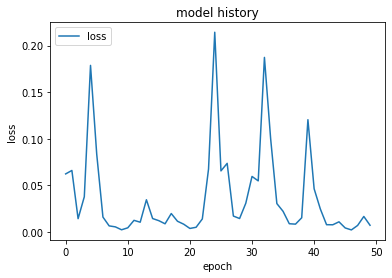

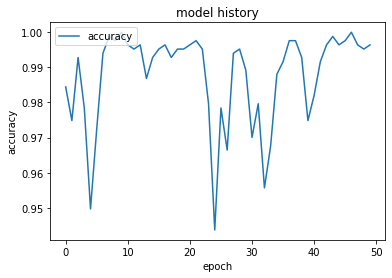

0.967391312122345
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  6  1  0  0]
 [ 0  0  0 19  2  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
----------------------------


In [9]:
prediction=[]
confusion_list=[]
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
num_classes = 6
for train_index, test_index in skf.split(img_data, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = img_data[train_index], img_data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    x_train=x_train.reshape(x_train.shape[0],IMAGE_WIDTH,IMAGE_HEIGHT,3)
    x_test=x_test.reshape(x_test.shape[0],IMAGE_WIDTH,IMAGE_HEIGHT,3)
    y_train =to_categorical(y_train, num_classes)
    y_test =to_categorical(y_test, num_classes)
    X,Y=cnn_model(x_train,x_test,y_test,y_train)
    prediction.append(X)
    confusion_list.append(Y)
    print(X)
    print(Y)
    print("----------------------------")

In [10]:
print(prediction)

[0.6129032373428345, 0.7204301357269287, 0.8602150678634644, 0.8924731016159058, 0.8924731016159058, 0.9569892287254333, 0.9569892287254333, 0.9239130616188049, 0.945652186870575, 0.967391312122345]


In [11]:
for x in range(len(confusion_list)): 
    print (confusion_list[x],sep = "\n")
    print("----------------------------")    

[[13  1  0  0  0  0]
 [16  2  0  0  0  0]
 [ 0  6  1  0  0  0]
 [ 0  0 10 11  0  0]
 [ 1  0  0  2  5  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[11  3  0  0  0  0]
 [10  8  0  0  0  0]
 [ 0  5  2  0  0  0]
 [ 0  0  3 18  0  0]
 [ 0  0  0  5  3  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[14  0  0  0  0  0]
 [ 2 15  0  0  0  0]
 [ 0  4  4  0  0  0]
 [ 0  0  5 16  0  0]
 [ 0  0  0  2  6  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[12  2  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  4  4  0  0]
 [ 0  0  2 19  0  0]
 [ 0  0  0  2  6  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[14  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  3  5  0  0]
 [ 0  0  4 16  0  0]
 [ 0  0  0  1  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[12  1  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  6  2  0  0]
 [ 0  0  1 19  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  8  0  0  0]
 